In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq
from pathlib import Path

sns.set_palette("pastel", 9)
#husl

### Handling missing values 
* capital -> remove 99999
* removing rows with more than 1 missing value

### Processing functions

In [142]:
def remove_leading_space(value):
    if isinstance(value, str) and value.startswith(' '):
        return value.lstrip()
    else:
        return value
    

def check_largest(df, column, n):
    x = heapq.nlargest(n, df[column].unique())
    print(x)

def check_smallest(df, column, n):
    x = heapq.nsmallest(n, df[column].unique())
    print(x)

In [143]:
file_path = Path('adults_data','adult_data.txt')

**fnlwgt** indicates how many people have the same features

In [144]:
column_names = ["age","workclass","fnlwgt", "education", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv(file_path, delimiter=',', header=None, names=column_names)
df.to_csv(Path('adults_data','original_dataset.csv'),index=False)

# Delete redundant attributes
df.pop("education")



# Delete leading space
df = df.applymap(remove_leading_space)


# Handle '?' missing values
df = df.replace("?", np.nan)



C:\Users\wypyc\AppData\Local\Temp\ipykernel_11232\1530955591.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_leading_space)


                workclass  occupation  native-country
Missing values       1836        1843             583
Valid values        30725       30718           31978


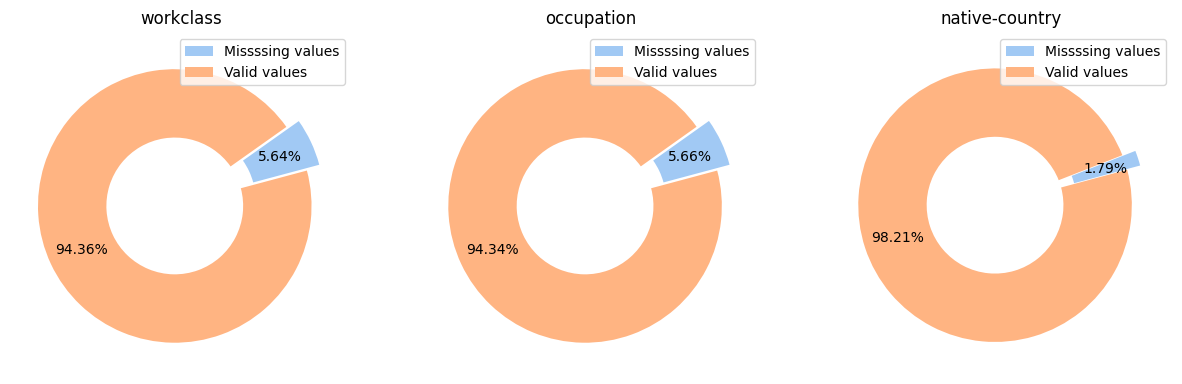

In [145]:
df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), 
                                  "Valid values": df.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))
print(df_missing_values)
axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)


In [146]:
# Capital bilans
df["capital-gain"] = df["capital-gain"] - df["capital-loss"] 
df = df.rename(columns = {"capital-gain":"capital"})
df.pop("capital-loss")


# Suspicios values with 9s



n = len(df)
n_features = len(df.columns) - 1

df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K


ValueError: Could not interpret value `income` for `x`. An entry with this name does not appear in `data`.

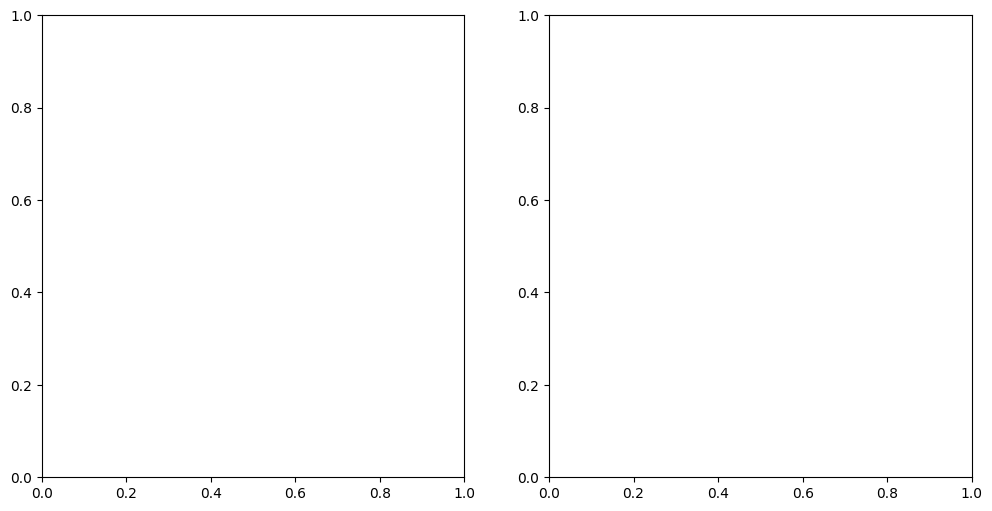

In [201]:
def null_count(row):
    return row.isnull().sum()

def nulls_table(data, threshold):
    
    temp_df = data.copy()
    temp_df['how-many-miss-vals'] = temp_df.apply(null_count, axis=1)
    temp_df_reduced = temp_df[temp_df['how-many-miss-vals'] <= threshold]
    nulls = temp_df_reduced['how-many-miss-vals'].value_counts()
    
    """no9 = temp_df_reduced[temp_df_reduced['capital'] != 99999]"""
    ### data distribution plotting ###
    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    ax1 = sns.countplot(data=temp_df, x="income", stat="percent", ax=axes[0])
    ax1.set_ylabel("Percentage")
    ax1.set_xlabel("Income")
    ax1.set_title("Income percentage distribution")


    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
        
    ax2 = sns.countplot(data=temp_df_reduced, x="income", stat="percent", ax=axes[1])
    ax2.set_ylabel("Percentage")
    ax2.set_xlabel("Income")
    ax2.set_title("Income percentage distribution after removing some rows")


    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    ### ### ###
    
    return temp_df_reduced

df_less_nulls = nulls_table(df,1)

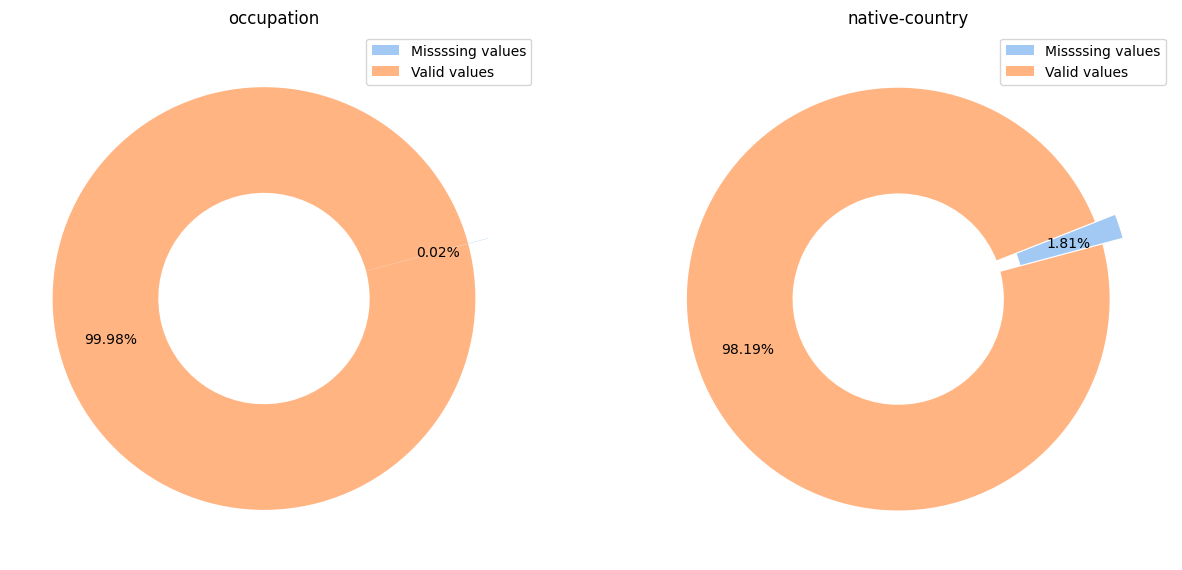

In [148]:
df_missing_values = pd.DataFrame({"Missing values": df_less_nulls.isnull().sum(), 
                                  "Valid values": df_less_nulls.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))

axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75)
    ax.set_title(col)
    ax.legend(labels)


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital         32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  31978 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [150]:
df.isnull().sum(axis=0) #amount of non values in each column

age                  0
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital              0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [151]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital             210
hours-per-week       94
native-country       41
income                2
dtype: int64

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital,32561.0,990.345014,7408.986951,-4356.0,0.0,0.0,0.0,99999.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


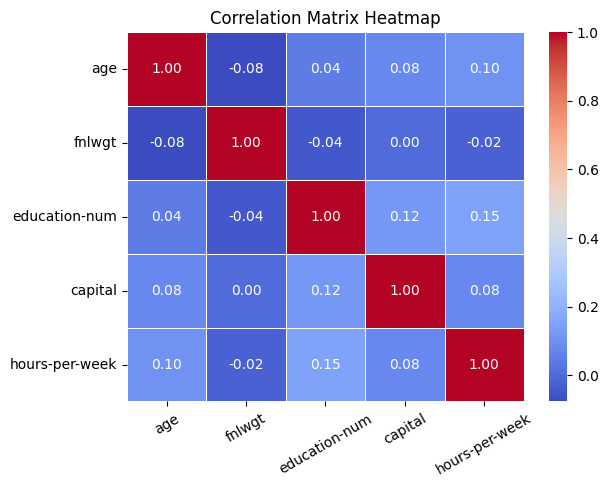

In [127]:
numeric_df = df_less_nulls.select_dtypes(include=['int','float']).drop('how-many-miss-vals',axis=1)

heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 30)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Conclusion**: there's no significant correlation

## Max values with 9s

In [9]:
check_largest(df, "capital", 10)

[99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 18481, 15831]


In [10]:
check_smallest(df, "capital", 10)

[-4356, -3900, -3770, -3683, -3004, -2824, -2754, -2603, -2559, -2547]


In [202]:
df_less_nulls[df_less_nulls['capital'] == 99999].shape

(155, 14)

In [221]:
def count_99_grouped(df, value, column, compare_column):
    df = df[[column, compare_column]]
    df_reduced = df[df[column] == value]
    df_reduced = df_reduced.groupby(compare_column).count()
    df_reduced = df_reduced.reset_index()
    cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column)
    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=60)

In [222]:
column = 'capital'
compare_column = 'occupation'
value = 99999
df = df_less_nulls.copy()
df = df[[column, compare_column]]
df_reduced = df[df[column] == value]
df_reduced = df_reduced.groupby(compare_column).count()
df_reduced = df_reduced.reset_index()
df_reduced

,occupation,capital
0,Adm-clerical,6
1,Craft-repair,8
2,Exec-managerial,42
3,Handlers-cleaners,1
4,Machine-op-inspct,1
5,Other-service,2
6,Prof-specialty,67
7,Protective-serv,1
8,Sales,25
9,Tech-support,1


C:\Users\wypyc\AppData\Local\Temp\ipykernel_11232\1254875216.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=60)


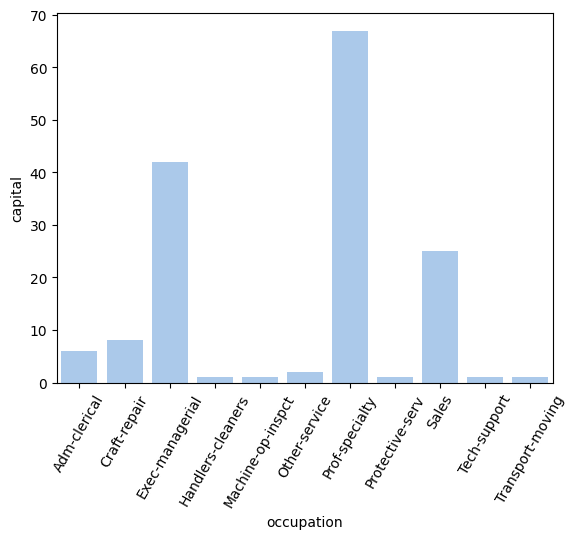

In [223]:
count_99_grouped(df_less_nulls, 99999, 'capital', 'occupation')


In [186]:
df["capital"] = df["capital"].replace(99999, np.nan)

In [12]:
df['capital'][df['capital']!= 0]

0         2174.0
8        14084.0
9         5178.0
23       -2042.0
32       -1408.0
          ...   
32515     3471.0
32518        NaN
32538    15020.0
32548     1086.0
32560    15024.0
Name: capital, Length: 4231, dtype: float64

In [13]:
check_largest(df, "hours-per-week", 20)
# godziny zawod

[99, 98, 97, 96, 95, 94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 82, 81, 80, 78, 77]


In [14]:
check_smallest(df, "hours-per-week", 20)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# GROUPING

In [15]:
region_mapping = {
    'United-States': "United-States",
    'Cuba' : "Middle America", 
    'Jamaica': "Middle America", 
    'India': "South Asia",
    'Mexico': "Mexico",
    'South': np.nan,    #### ??????
    'Puerto-Rico': "Middle America", 
    'Honduras': "Middle America", 
    'England': "West Europe", 
    'Canada': "Canada",
    'Germany': "Central Europe", 
    'Iran': "West Asia", 
    'Philippines': "Southeast Asia", 
    'Italy': "Central Europe", 
    'Poland': "East Europe",
    'Columbia': "South America", 
    'Cambodia': "Southeast Asia", 
    'Thailand': "Southeast Asia", 
    'Ecuador': "South America", 
    'Laos': "Southeast Asia",
    'Taiwan': "West Asia", 
    'Haiti': "Middle America", 
    'Portugal': "West Europe", 
    'Dominican-Republic': "Middle America",
    'El-Salvador': "Middle America", 
    'France': "West Europe", 
    'Guatemala': "Middle America", 
    'China': "East Asia", 
    'Japan': "East Asia",
    'Yugoslavia' : "East Europe", 
    'Peru': "South America", 
    'Outlying-US': "Outlying-US", 
    'Scotland': "West Europe",
    'Trinadad&Tobago': "South America", 
    'Greece': "South Europe", 
    'Nicaragua': "Middle America", 
    'Vietnam': "Southeast Asia", 
    'Hong': np.nan,           #### ??????
    'Ireland': "West Europe", 
    'Hungary': "East Europe", 
    'Holand-Netherlands': "Central Europe"
}


df["native-country"] = df["native-country"].map(region_mapping, na_action="ignore")

In [16]:
bins= [0,18,25,31,41,51,61,71,150]
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71+']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels_age, right=False)
df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income
0,31-40,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40,United-States,<=50K
1,41-50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13,United-States,<=50K
2,31-40,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40,United-States,<=50K
3,51-60,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40,United-States,<=50K
4,25-30,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40,Middle America,<=50K


In [17]:
df.to_csv(Path("adults_data","adult_cleaned_data.csv"), index=None)

In [18]:
df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,native-country,income
0,31-40,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40,United-States,<=50K
1,41-50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13,United-States,<=50K
2,31-40,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40,United-States,<=50K
3,51-60,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40,United-States,<=50K
4,25-30,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40,Middle America,<=50K
